# Review

Well, Class We've arrived:

![Screenshot%202020-02-23%2018.44.43.png](https://github.com/BlohmLab/NSCI801-QuantNeuro/blob/master/Figures/lastlec.png?raw=1)

So what are we going over today? 

# Image processing

Scikit-image is a Python package dedicated to image processing, and using natively NumPy arrays as image objects. This lecture describes how to use scikit-image on various image processing tasks, and links it with other scientific Python modules such as NumPy and SciPy

Digital image processing allows the use of much more complex algorithms, and hence, can offer both more sophisticated performance at simple tasks, and the implementation of methods which would be impossible by analog means.

Why?

In particular, digital image processing is the only practical technology for:

Classification

Feature extraction

Multi-scale signal analysis

Pattern recognition

Projection

But I digress, Image processing could be useful in reading radiology reports. 

Before we jump ahead we need to figure out how to display images:

The package to use is Matplotlib, and displaying 2D images is done using imshow:

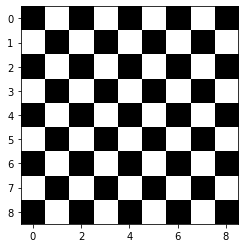

In [2]:
import numpy as np
check = np.zeros((9, 9))
check[::2, 1::2] = 1
check[1::2, ::2] = 1

import matplotlib.pyplot as plt
plt.imshow(check, cmap='gray', interpolation='nearest') 
plt.show()

In [21]:
check = np.zeros((9, 9))
check[::2, 1::2] = 1
check

array([[0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.]])

We did it:

![alt text](https://github.com/BlohmLab/NSCI801-QuantNeuro/blob/master/Figures/Boom.png?raw=1)

Creating a simple figure for plotting

## Input/output and data types 

Reading from files: skimage.io.imread()

Works with all data formats supported by the Python Imaging Library (or any other I/O plugin provided to imread with the plugin keyword argument).

Also works with URL image paths:

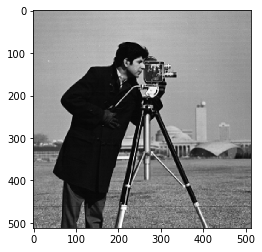

In [3]:
from skimage import io, filters
from skimage import data
import skimage as ski
import os
filename = os.path.join(ski.data_dir, 'camera.png')
camera = io.imread(filename)
# logo = io.imread('http://scikit-image.org/_static/img/logo.png')
plt.imshow(camera, cmap='gray', interpolation='nearest') 
plt.show()

Or we can do local files as well..... for example:

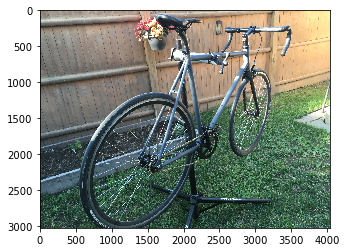

In [23]:
filename2 = "C:/Users/Blast/Downloads/2020-07-04_17-58-02_044.jpeg"
dixie = io.imread(filename2)
plt.imshow(dixie, cmap='gray', interpolation='nearest') 
plt.show()

Image ndarrays can be represented either by integers (signed or unsigned) or floats.

Careful with overflows with integer data types

Different integer sizes are possible: 8-, 16- or 32-bytes, signed or unsigned.

uint8
(512, 512)


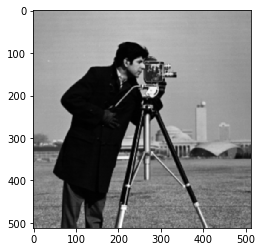

In [5]:
print(camera.dtype)
print(camera.shape)
filtered_camera = filters.gaussian(camera, 1)
type(filtered_camera) 
plt.imshow(filtered_camera, cmap='gray', interpolation='nearest') 
plt.show()


Some image processing routines need to work with float arrays, and may hence output an array with a different type and the data range from the input array

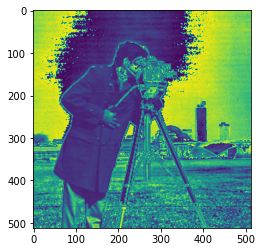

In [26]:
camera = data.camera()
camera.dtype
camera_multiply = 3 * camera
plt.imshow(camera_multiply, cmap='gray', interpolation='nearest') 
plt.show()



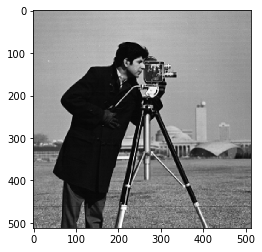

In [27]:
from skimage import img_as_float
camera_float = img_as_float(camera)
camera.max(), camera_float.max()

plt.imshow(camera_float, cmap='gray', interpolation='nearest') 
plt.show()



In [38]:
camera_float
camera_float.dtype


dtype('float64')

In [36]:
camera_multiply = 3 * camera
camera_multiply

array([[212, 215, 224, ..., 200, 200, 200],
       [212, 215, 221, ..., 200, 200, 200],
       [218, 215, 212, ..., 200, 200, 200],
       ...,
       [107, 113, 122, ..., 107,  83,  77],
       [107, 113, 122, ..., 107,  83,  77],
       [107, 113, 122, ..., 107,  83,  77]], dtype=uint8)

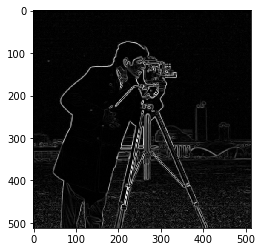

<Figure size 1440x144 with 0 Axes>

In [40]:
from skimage import filters
camera_sobel = filters.sobel(camera)
camera_sobel.max() 
plt.imshow(camera_sobel, cmap='gray', interpolation='nearest') 
plt.show()


Color images are of shape (N, M, 3) or (N, M, 4) (when an alpha channel encodes transparency)

Routines converting between different colorspaces (RGB, HSV, LAB etc.) are available in skimage.color : color.rgb2hsv, color.lab2rgb, etc. Check the docstring for the expected dtype (and data range) of input images.

In [39]:
import scipy
face = scipy.misc.face()
face.shape


(768, 1024, 3)

Goals: denoising, feature (edges) extraction, …

Local filters replace the value of pixels by a function of the values of neighboring pixels. The function can be linear or non-linear.
Neighbourhood: square (choose size), disk, or more complicated structuring element.

![kernels1.png](https://github.com/BlohmLab/NSCI801-QuantNeuro/blob/master/Figures/kernels1.png?raw=1)

In [55]:
text = data.text()
hsobel_text = filters.sobel_h(text)

Non-local filters use a large region of the image (or all the image) to transform the value of one pixel:

Enhances contrast in large almost uniform regions.

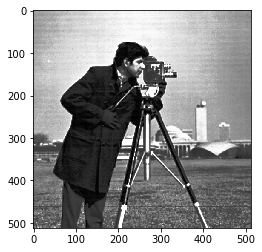

In [42]:
from skimage import exposure
camera = data.camera()
camera_equalized = exposure.equalize_hist(camera)

# plt.imshow(camera, cmap='gray', interpolation='nearest') 
plt.imshow(camera_equalized, cmap='gray', interpolation='nearest') 
plt.show()



## Mathematics on Images

Probe an image with a simple shape (a structuring element), and modify this image according to how the shape locally fits or misses the image.

Default structuring element: 4-connectivity of a pixel

In [51]:
from skimage import morphology
print(morphology.diamond(1))
print()
print(morphology.diamond(2))

[[0 1 0]
 [1 1 1]
 [0 1 0]]

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


Erosion = minimum filter. Replace the value of a pixel by the minimal value covered by the structuring element.:

In [52]:
a = np.zeros((7,7), dtype=np.uint8)
a[1:8, 2:6] = 1
print(a)

#morphology.binary_erosion(a, morphology.diamond(1)).astype(np.uint8)


#Erosion removes objects smaller than the structure
morphology.binary_erosion(a, morphology.diamond(2)).astype(np.uint8)


[[0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0]
 [0 0 1 1 1 1 0]
 [0 0 1 1 1 1 0]
 [0 0 1 1 1 1 0]
 [0 0 1 1 1 1 0]
 [0 0 1 1 1 1 0]]


array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

Dilation: maximum filter:

In [54]:
a = np.zeros((5, 5))
a[2, 2] = 1
print(a)

morphology.binary_dilation(a, morphology.diamond(1)).astype(np.uint8)







[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

Opening: erosion + dilation:

Opening removes small objects and smoothes corners.

In [15]:
a = np.zeros((5,5), dtype=np.int)
a[1:4, 1:4] = 1; a[4, 4] = 1
a

morphology.binary_opening(a, morphology.diamond(1)).astype(np.uint8)


C:\Users\Blast\AppData\Local\Temp/ipykernel_18776/4221665496.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.zeros((5,5), dtype=np.int)


array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

## Example of filters comparison: image denoising

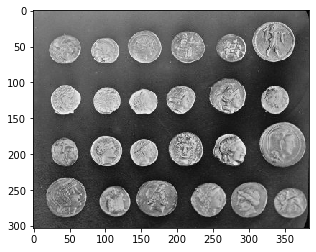

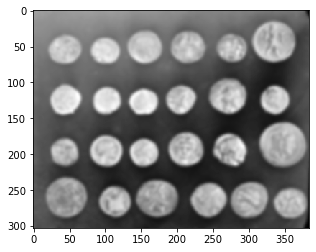

In [65]:
from skimage.morphology import disk
coins = data.coins()
coins_zoom = coins[10:80, 300:370]
median_coins = filters.median(coins_zoom, disk(1))
from skimage import restoration
tv_coins = restoration.denoise_tv_chambolle(coins_zoom, weight=0.1)
gaussian_coins = filters.gaussian(coins, sigma=2)
gaussian_coins_zoom = filters.gaussian(coins, sigma=1)

#plt.imshow(coins_zoom, cmap='gray', interpolation='nearest') 
#plt.imshow(tv_coins, cmap='gray', interpolation='nearest') 
#plt.imshow(gaussian_coins, cmap='gray', interpolation='nearest') 
#plt.imshow(gaussian_coins, cmap='gray', interpolation='nearest') 
#plt.imshow(gaussian_coins, cmap='gray', interpolation='nearest') 
plt.imshow(coins, cmap='gray', interpolation='nearest') 
plt.show()
plt.imshow(gaussian_coins, cmap='gray', interpolation='nearest') 
plt.show()


## Image segmentation

Image segmentation is the attribution of different labels to different regions of the image, for example in order to extract the pixels of an object of interest.

#### 3.3.4.1. Binary segmentation: foreground + background

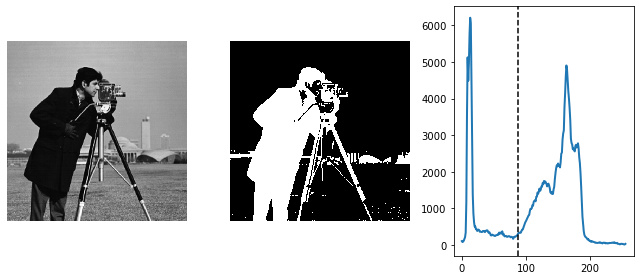

In [66]:
from skimage import data
from skimage import filters
camera = data.camera()
val = filters.threshold_otsu(camera)
mask = camera < val

import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import exposure

camera = data.camera()
val = filters.threshold_otsu(camera)

hist, bins_center = exposure.histogram(camera)

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(camera < val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')

plt.tight_layout()
plt.show()

So The Question is why is this helpful??

# Cell Counting



![dna](https://github.com/BlohmLab/NSCI801-QuantNeuro/blob/master/Figures/dna.jpeg?raw=true)

In [73]:
import numpy as np
import pylab
import mahotas as mh

#read in data
dna = mh.imread('Figures/dna.jpeg')
dna.shape
dna_new = dna.squeeze()

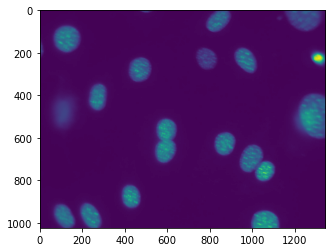

In [74]:
pylab.imshow(dna_new)
pylab.show()

In [78]:
dna.shape
dna.max()


252

You might be surprised that the image does not look at all like the one above. It will probably look like:

This is because, by default, pylab shows images as a heatmap. You can see the more traditional grey-scale image by switching the colormap used. Instead of the default jet colourmap, we can set it to the gray one, which is the traditional greyscale representation

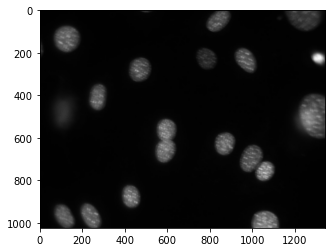

In [79]:
pylab.imshow(dna_new)
pylab.gray()
pylab.show()

In [80]:
print(dna_new.shape)
print(dna_new.dtype)
print(dna_new.max())
print(dna_new.min())

(1024, 1344)
uint8
252
0


The shape is 1024 pixels high and 1344 pixels across (recall that the convention is the matrix convention: height x width). The type is uint8, i.e., unsigned 8-bit integer. The maximum value is 252 and the minimum value is 0 3.

# Lets figure this out

Here’s the first idea for counting the nuclei. We are going to threshold the image and count the number of objects.




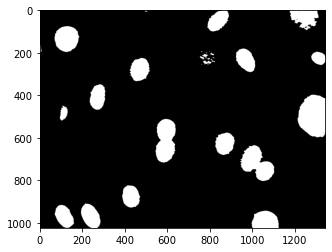

In [81]:
T = mh.thresholding.otsu(dna_new)
pylab.imshow(dna_new > T)
pylab.show()

Here, again, we are taking advantage of the fact that dna is a numpy array and using it in logical operations (dna > T). The result is a numpy array of booleans, which pylab shows as a black and white image (or red and blue if you have not previously called pylab.gray()).


This isn’t too good. The image contains many small objects. There are a couple of ways to solve this. A simple one is to smooth the image a bit using a Gaussian filter.

[[1 1 1 ... 9 9 9]
 [1 1 1 ... 9 9 9]
 [1 1 1 ... 9 9 9]
 ...
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]]


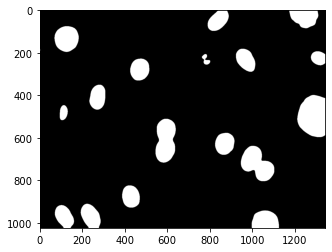

In [82]:
dnaf = mh.gaussian_filter(dna_new, 8)
dnaf1 =  dnaf.astype('uint8')
print(dnaf1)
T = mh.thresholding.otsu(dnaf1)
pylab.imshow(dnaf1 > T)
pylab.show()

The function mh.gaussian_filter takes an image and the standard deviation of the filter (in pixel units) and returns the filtered image. We are jumping from one package to the next, calling mahotas to filter the image and to compute the threshold, using numpy operations to create a thresholded images, and pylab to display it, but everyone works with numpy arrays. The result is much better.

We now have some merged nuclei (those that are touching), but overall the result looks much better. The final count is only one extra function call away:

18


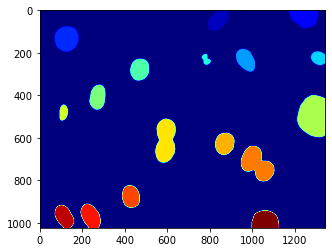

In [83]:
labeled,nr_objects = mh.label(dnaf > T)
print(nr_objects)
pylab.imshow(labeled)
pylab.jet()
pylab.show()

Is this alright?

![alt text](https://github.com/BlohmLab/NSCI801-QuantNeuro/blob/master/Figures/hardno.png?raw=1)

![alt text](https://github.com/BlohmLab/NSCI801-QuantNeuro/blob/master/Figures/Icandobetter.png?raw=1)

We now have the number of objects in the image (18), and we also displayed the labeled image. The call to pylab.jet() just resets the colourmap to jet if you still had the greyscale map active.

We can explore the labeled object. It is an integer array of exactly the same size as the image that was given to mh.label(). It’s value is the label of the object at that position, so that values range from 0 (the background) to nr_objects.


## Second Task: Segmentation of the image

The previous result was acceptable for a first pass, but there were still nuclei glued together. Let’s try to do better.

Here is a simple, traditional, idea:

1 - smooth the image
2 - find regional maxima
3 - Use the regional maxima as seeds for watershed

## Finding the seeds

[[1.         1.         1.         ... 9.25339223 9.13803302 9.08012871]
 [1.         1.         1.         ... 9.25078765 9.13518282 9.07715502]
 [1.         1.         1.         ... 9.24549432 9.1294058  9.07113486]
 ...
 [2.         2.         2.         ... 1.         1.         1.        ]
 [2.         2.         2.         ... 1.         1.         1.        ]
 [2.         2.         2.         ... 1.         1.         1.        ]]


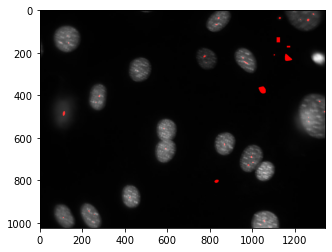

In [84]:
dnaf = mh.gaussian_filter(dna_new, 8)
print(dnaf)
dnaf_8 =  dnaf.astype('uint8')
# print(dna_new[dna_new>T])
rmax = mh.regmax(dnaf_8)
pylab.imshow(mh.overlay(dna_new, rmax))
pylab.show()

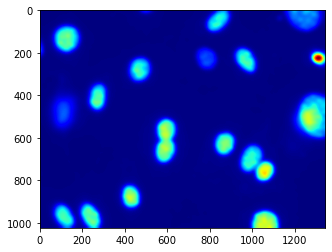

In [85]:
pylab.imshow(dnaf)
pylab.show()

After a little fiddling around, we decide to try the same idea with a thresholded_image:

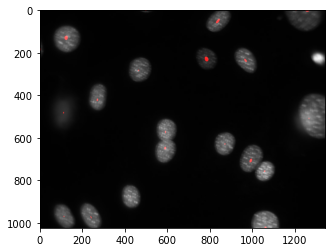

In [86]:
dnaf = mh.gaussian_filter(dna_new, 16)
dnaf_8 =  dnaf.astype('uint8')
rmax = mh.regmax(dnaf_8)
pylab.imshow(mh.overlay(dna_new, rmax))
pylab.show()

In [87]:
seeds,nr_nuclei = mh.label(rmax)
print(nr_nuclei)
np.where(seeds>0)

22


(array([   0,    0,    0, ..., 1023, 1023, 1023], dtype=int64),
 array([ 493,  494,  495, ..., 1062, 1063, 1064], dtype=int64))

Now things look much better.

# Watershed


We are going to apply watershed to the distance transform of the thresholded image:

Watershedding treats images like a set of peaks and valleys - and tries to cut them down accordingly

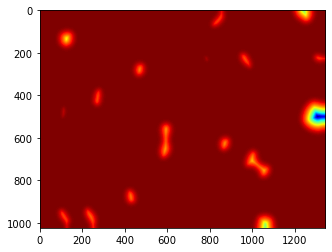

In [108]:
dnaf = mh.gaussian_filter(dna_new, 16)
dnaf2 =  dnaf.astype('uint8')
T1 = mh.thresholding.otsu(dnaf2)
print
dist = mh.distance(dnaf2 > T1)
dist = dist.max() - dist
dist -= dist.min()
dist = dist/float(dist.ptp()) * 255
dist = dist.astype(np.uint8)
pylab.imshow(dist)
pylab.show()

After we contrast stretched the dist image, we can call mh.cwatershed to get the final result (the colours in the image come from it being displayed using the jet colourmap):



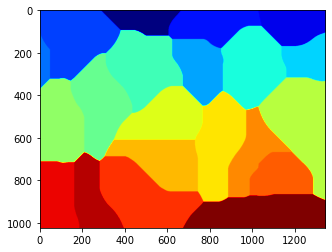

In [109]:
nuclei = mh.cwatershed(dist, seeds)
pylab.imshow(nuclei)
pylab.show()


In [110]:
dnaf = mh.gaussian_filter(dna_new, 16)
# # print(dnaf)
dnaf_8 =  dna_new.astype('uint8')
#nuclei = mh.cwatershed(dnaf_8, seeds)
#print(nuclei)
print(len(np.unique(nuclei)))
#pylab.imshow(nuclei)
#pylab.show()


22


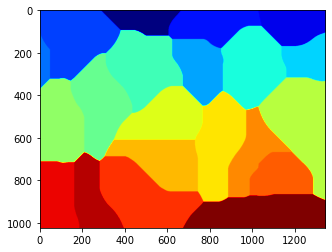

In [111]:
whole = mh.segmentation.gvoronoi(nuclei)
pylab.imshow(whole)
pylab.show()

In [99]:
print(len(np.unique(whole)))

22
